# Dependencies

In [ ]:
# importa librerie
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_folder = '/content/drive/MyDrive/ADSP/data/'

In [ ]:
data_folder = '/content/drive/MyDrive/Progetto Lavazza/Dataset/'

# Concatenation

In [ ]:
# carica commenti e recenzioni elaborate
elaborated_comments_df = pd.read_csv(data_folder+'elaborated_comments.csv', sep='\t')
elaborated_reviews_df = pd.read_csv(data_folder+'elaborated_reviews.csv', sep='\t')

In [ ]:
# controlla le colonne
print(elaborated_comments_df.columns)
print(elaborated_reviews_df.columns)

Index(['text', 'postUrl', 'commentTimeStamp', 'postCaption', 'postTimeStamp',
       'model', 'Media type', 'isComment', 'Source', 'relevanceLabel',
       'positiveTopicClass', 'negativeTopicClass', 'primaryPositiveAspect',
       'primaryNegativeAspect', 'sentiment'],
      dtype='object')
Index(['text', 'channel', 'reviewDate', 'model', 'positiveTopicClass',
       'negativeTopicClass', 'primaryPositiveAspect', 'primaryNegativeAspect',
       'feedbackRating'],
      dtype='object')


In [ ]:
def convert_to_datetime(value):
    if isinstance(value, str):
        try:
            return pd.to_datetime(value)
        except ValueError:
            # Handle various date formats if needed
            try:
                return pd.to_datetime(value, format='%Y-%m-%d')  # Example: for 'YYYY-MM-DD' format
            except ValueError:
                try:
                    return pd.to_datetime(value, format='%m/%d/%Y') # Example: for 'MM/DD/YYYY' format
                except ValueError:
                    print(f"Warning: Could not convert '{value}' to datetime. Returning NaN.")
                    return pd.NaT  # Return Not a Time value
    return pd.NaT if pd.isna(value) else value


# Rename columns
elaborated_comments_df = elaborated_comments_df.rename(columns={'commentTimeStamp': 'feedbackDate'})
elaborated_reviews_df = elaborated_reviews_df.rename(columns={'reviewDate': 'feedbackDate'})

# Convert 'feedbackDate' to datetime objects in both dataframes
elaborated_comments_df['feedbackDate'] = elaborated_comments_df['feedbackDate'].apply(convert_to_datetime)
elaborated_reviews_df['feedbackDate'] = elaborated_reviews_df['feedbackDate'].apply(convert_to_datetime)

# Verify the first few values (optional)
print(elaborated_comments_df['feedbackDate'].head())
print(elaborated_reviews_df['feedbackDate'].head())

0   2023-08-27 07:35:30+00:00
1   2023-10-01 19:03:35+00:00
2   2023-09-29 09:58:03+00:00
3   2023-09-28 14:11:20+00:00
4   2023-09-28 12:09:52+00:00
Name: feedbackDate, dtype: datetime64[ns, UTC]
0   2024-08-17
1   2023-02-27
2   2023-01-13
3   2022-12-27
4   2023-03-04
Name: feedbackDate, dtype: datetime64[ns]


In [ ]:
elaborated_comments_df = elaborated_comments_df.rename(columns={'Media type': 'feedbackPlatform'})
elaborated_reviews_df = elaborated_reviews_df.rename(columns={'channel': 'feedbackPlatform'})

In [ ]:
elaborated_feedbacks = pd.concat([elaborated_comments_df, elaborated_reviews_df], ignore_index=True)

# Fill the isComment column with False if Nan
elaborated_feedbacks['isComment'] = elaborated_feedbacks['isComment'].fillna(False)

In [ ]:
# salva il dataframe in locale
elaborated_feedbacks.to_csv(data_folder+'elaborated_feedbacks.csv', index=False)

# KPI Functions

## Total Comments and Reviews

In [ ]:
# Analysis of the total number of comments and reviews present in the dataset.

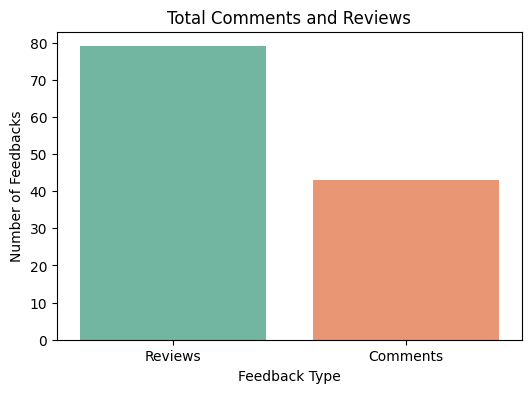

In [ ]:
# Mappare i valori booleani in "Reviews" e "Comments"
total_feedbacks = elaborated_feedbacks.copy()
total_feedbacks['Feedback Type'] = total_feedbacks['isComment'].replace({False: 'Reviews', True: 'Comments'})

# Calcolare il numero di feedback per ciascun tipo
total_feedbacks_count = total_feedbacks['Feedback Type'].value_counts().reset_index()
total_feedbacks_count.columns = ['Feedback Type', 'Number of Feedbacks']

# Creare il grafico a barre con il parametro hue per evitare l'avviso
plt.figure(figsize=(6, 4))
sns.barplot(x='Feedback Type', y='Number of Feedbacks', data=total_feedbacks_count, hue='Feedback Type', palette='Set2', legend=False)

# Aggiungere il titolo e etichetta
plt.title('Total Comments and Reviews')
plt.ylabel('Number of Feedbacks')

# Mostrare il grafico
plt.show()


## Distribution of Comments and Reviews by Platform

In [ ]:
# Visualization of the distribution of comments and reviews by platform.

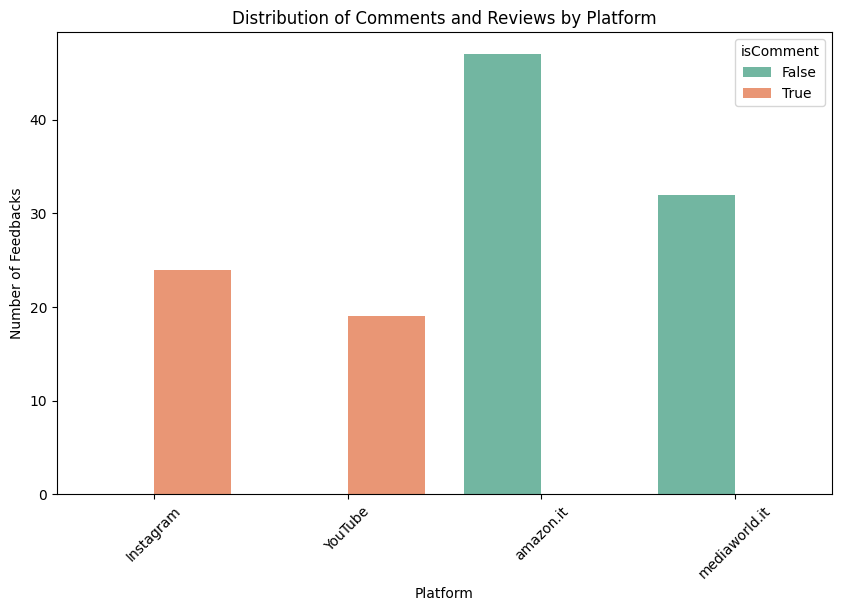

In [ ]:
# Raggruppa i dati per piattaforma e tipo di feedback
platform_feedbacks = elaborated_feedbacks.groupby(['feedbackPlatform', 'isComment']).size().unstack().fillna(0).reset_index()

# Riorganizzare i dati in formato lungo con melt
platform_feedbacks_melted = platform_feedbacks.melt(id_vars="feedbackPlatform", value_vars=[False, True], var_name="isComment", value_name="Number of Feedbacks")

# Creare il grafico a barre con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='feedbackPlatform', y='Number of Feedbacks', hue='isComment', data=platform_feedbacks_melted, palette='Set2')

# Aggiungere titolo e etichette
plt.title('Distribution of Comments and Reviews by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Feedbacks')

# Ruotare le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostrare il grafico
plt.show()


## Distribution of Comments and Reviews by Model

In [ ]:
# Analysis of the distribution of comments and reviews by model.

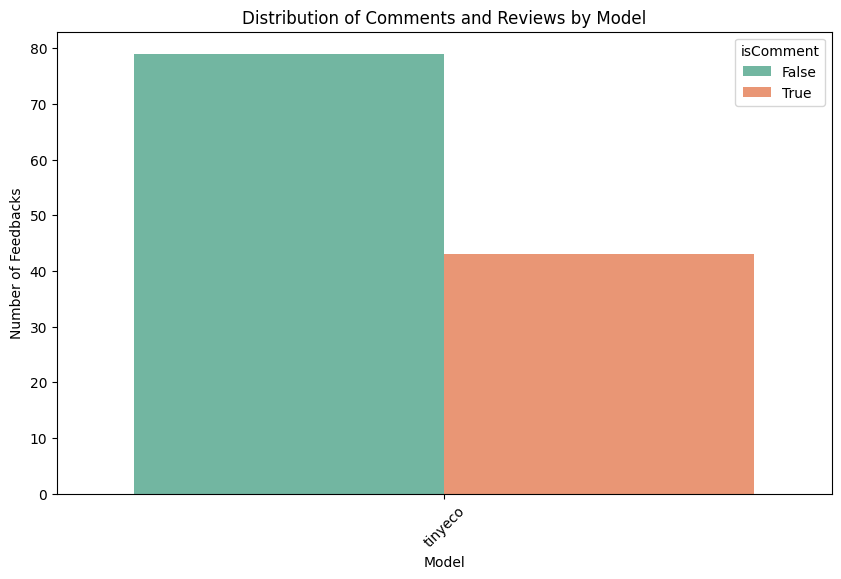

In [ ]:
# Raggruppa i dati per modello e tipo di feedback
platform_feedbacks = elaborated_feedbacks.groupby(['model', 'isComment']).size().unstack().fillna(0).reset_index()

# Riorganizzare i dati in formato lungo con melt
platform_feedbacks_melted = platform_feedbacks.melt(id_vars="model", value_vars=[False, True], var_name="isComment", value_name="Number of Feedbacks")

# Creare il grafico a barre con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='Number of Feedbacks', hue='isComment', data=platform_feedbacks_melted, palette='Set2')

# Aggiungere titolo e etichette
plt.title('Distribution of Comments and Reviews by Model')
plt.xlabel('Model')
plt.ylabel('Number of Feedbacks')

# Ruotare le etichette sull'asse x per una migliore leggibilità
plt.xticks(rotation=45)

# Mostrare il grafico
plt.show()


## Sentiment/Star Rating Distribution for Product X

In [ ]:
# Analysis of sentiment distribution and the average star rating for a specific product (e.g., "Product X").

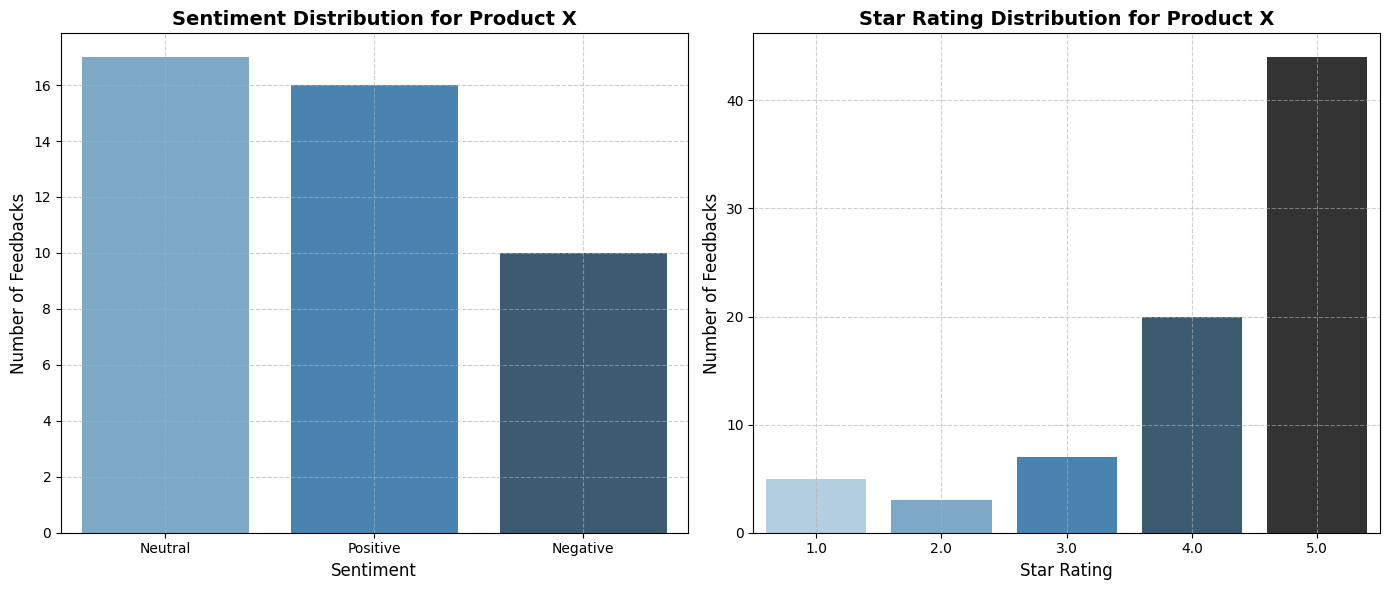

In [ ]:
# Filtro dei feedback per il modello 'tinyeco'
product_feedbacks = elaborated_feedbacks[elaborated_feedbacks['model'] == 'tinyeco']

# Distribuzione del sentiment
sentiment_distribution = product_feedbacks['sentiment'].value_counts().reset_index()
sentiment_distribution.columns = ['Sentiment', 'Number of Feedbacks']

# Distribuzione delle valutazioni in stelle
star_rating_distribution = product_feedbacks['feedbackRating'].value_counts().reset_index()
star_rating_distribution.columns = ['Star Rating', 'Number of Feedbacks']

# Creare il grafico con due subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Primo grafico: Distribuzione del sentiment
sns.barplot(x='Sentiment', y='Number of Feedbacks', data=sentiment_distribution, hue='Sentiment', palette='Blues_d', ax=axes[0], legend=False)
axes[0].set_title('Sentiment Distribution for Product X', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Number of Feedbacks', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Secondo grafico: Distribuzione delle valutazioni in stelle
sns.barplot(x='Star Rating', y='Number of Feedbacks', data=star_rating_distribution, hue='Star Rating', palette='Blues_d', ax=axes[1], legend=False)
axes[1].set_title('Star Rating Distribution for Product X', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Star Rating', fontsize=12)
axes[1].set_ylabel('Number of Feedbacks', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Regolare l'aspetto e mostrare il grafico
plt.tight_layout()
plt.show()


## Distribution of Positive and Negative Topics for Product X

In [ ]:
# Analysis of the distribution of positive and negative topics for "Product X".

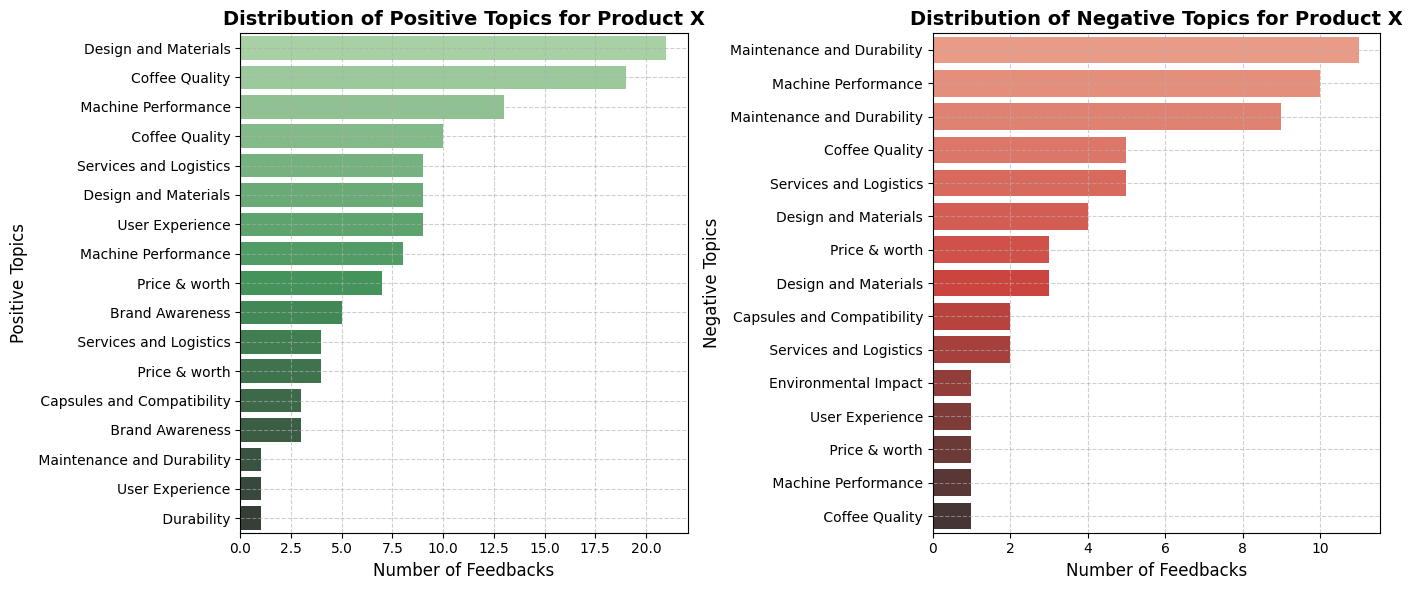

In [ ]:
# Filtro dei feedback per il modello 'tinyeco'
product_feedbacks = elaborated_feedbacks[elaborated_feedbacks['model'] == 'tinyeco']

# Rimuovere "NONE" dai topic
positive_topics_filtered = elaborated_feedbacks['positiveTopicClass'].str.split(',').explode()
positive_topics_filtered = positive_topics_filtered[positive_topics_filtered != 'NONE']

negative_topics_filtered = elaborated_feedbacks['negativeTopicClass'].str.split(',').explode()
negative_topics_filtered = negative_topics_filtered[negative_topics_filtered != 'NONE']

# Conta i topic positivi e negativi
positive_topic_counts = positive_topics_filtered.value_counts().reset_index()
negative_topic_counts = negative_topics_filtered.value_counts().reset_index()

# Rinominare le colonne per uniformità
positive_topic_counts.columns = ['Topic', 'Number of Feedbacks']
negative_topic_counts.columns = ['Topic', 'Number of Feedbacks']

# Creare il grafico con due subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Primo grafico: Distribuzione dei topic positivi
sns.barplot(x='Number of Feedbacks', y='Topic', data=positive_topic_counts, palette='Greens_d', hue='Topic', ax=axes[0], legend=False)
axes[0].set_title('Distribution of Positive Topics for Product X', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Feedbacks', fontsize=12)
axes[0].set_ylabel('Positive Topics', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Secondo grafico: Distribuzione dei topic negativi
sns.barplot(x='Number of Feedbacks', y='Topic', data=negative_topic_counts, palette='Reds_d', hue='Topic', ax=axes[1], legend=False)
axes[1].set_title('Distribution of Negative Topics for Product X', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Feedbacks', fontsize=12)
axes[1].set_ylabel('Negative Topics', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Regolare l'aspetto e mostrare il grafico
plt.tight_layout()
plt.show()


## Primary Positive Aspect for Positive Topic (Machine Performance)

In [ ]:
# Identification of the main positive aspects associated with positive feedback on the "Machine Performance" topic.

In [ ]:
# Extract positive feedback related to Machine Performance
product_feedbacks = elaborated_feedbacks[elaborated_feedbacks['model'] == 'tinyeco']
positive_aspects = product_feedbacks[product_feedbacks['positiveTopicClass'].str.contains('Machine Performance')]
positive_aspects = positive_aspects[positive_aspects['primaryPositiveAspect'] != 'NONE']['primaryPositiveAspect']

if positive_aspects.empty:
    print("No feedback found for the negative aspect 'Coffee quality'.")
else:
    # Trova il principale aspetto positivo
    primary_positive_aspect = positive_aspects.mode()[0]
    print(f"Primary Positive Aspect for Machine Performance: {primary_positive_aspect}")

Primary Positive Aspect for Machine Performance: Good coffee


## Primary Negative Aspect for Negative Topic (Coffee Quality)

In [ ]:
# Identification of the main negative aspects associated with negative feedback on the "Coffee Quality" topic.

In [ ]:
# Filtro dei feedback per il modello 'tinyeco' e il topic negativo 'Maintenance and Durability'
product_feedbacks = elaborated_feedbacks[elaborated_feedbacks['model'] == 'tinyeco']

# Escludere 'NONE' dai risultati prima di analizzare gli aspetti negativi
negative_aspects = product_feedbacks[product_feedbacks['negativeTopicClass'].str.contains('Machine Performance')]
negative_aspects = negative_aspects[negative_aspects['primaryNegativeAspect'] != 'NONE']['primaryNegativeAspect']

# Verifica se la serie è vuota
if negative_aspects.empty:
    print("No primary negative aspect found for 'Machine Performance'.")
else:
    # Trova il principale aspetto negativo
    primary_negative_aspect = negative_aspects.mode()[0]
    print(f"Primary Negative Aspect for Maintenance and Durability: {primary_negative_aspect}")


No primary negative aspect found for 'Machine Performance'.


## Cross-category matrix for matching responses



We create a cross-category matrix that counts how often two categories have matching responses. First, we separate the positive and negative responses, then generate individual matrices for each. Finally, we combine them to visualize the overall patterns and overlaps between categories. The result is shown as a heatmap.

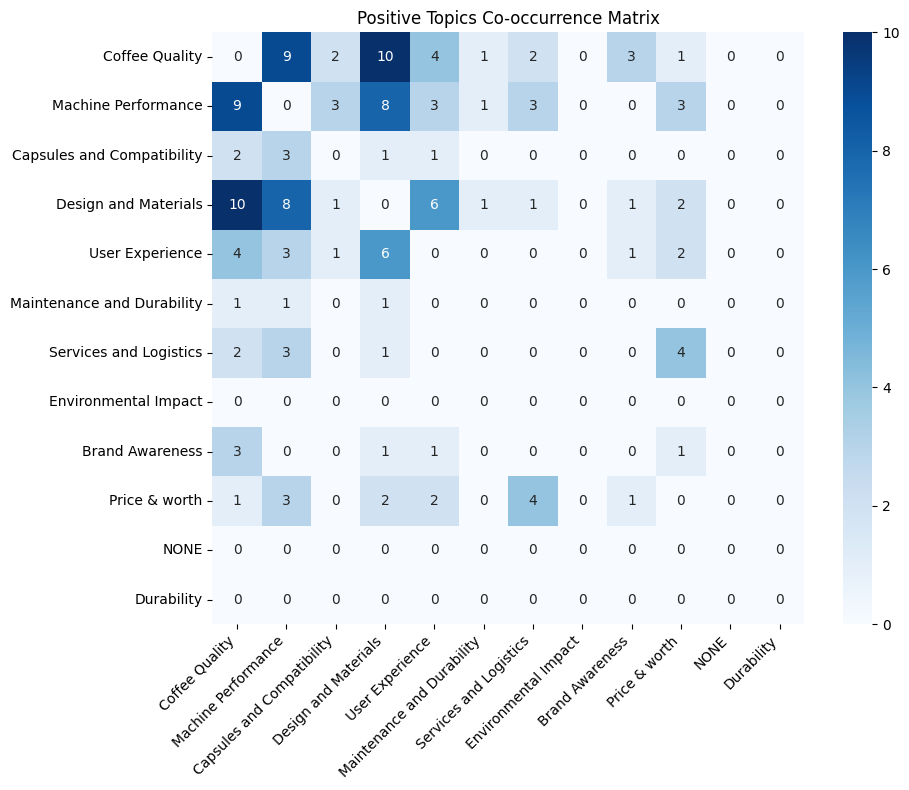

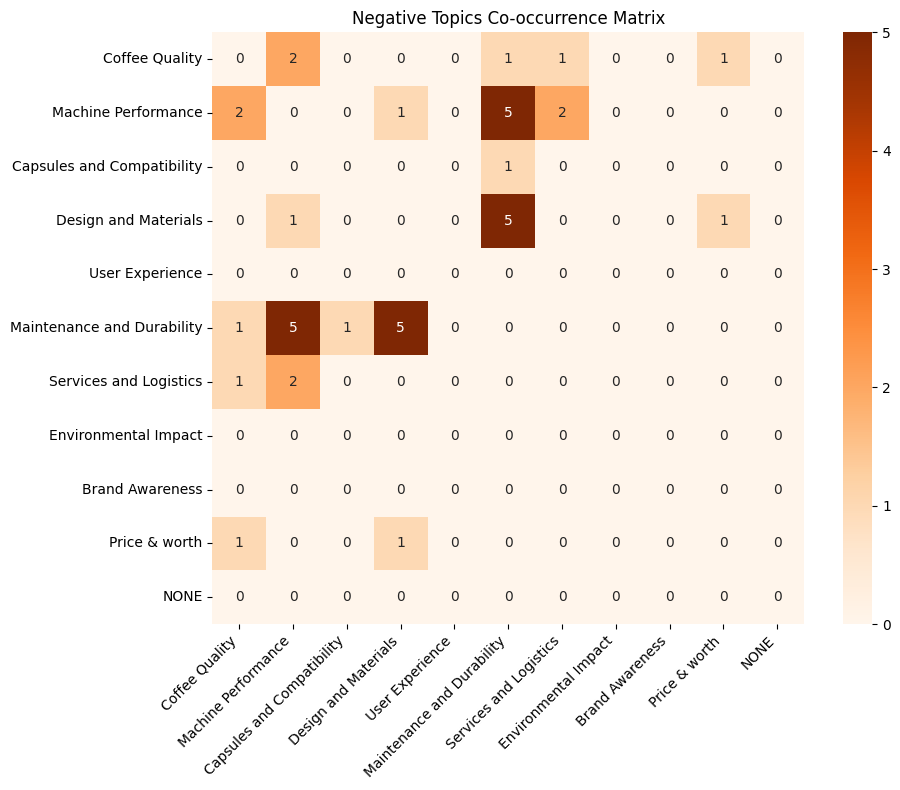

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lista dei topic
topics = [
    "Coffee Quality", "Machine Performance", "Capsules and Compatibility",
    "Design and Materials", "User Experience", "Maintenance and Durability",
    "Services and Logistics", "Environmental Impact", "Brand Awareness", "Price & worth"
]

def create_cooccurrence_matrix(df, topic_column):
    """
    Creates a co-occurrence matrix based on a topic column.
    Each row represents a feedback instance, and the presence of topics is marked with 1.
    The diagonal of the matrix is set to zero to exclude self-co-occurrence.
    """

    # Creare una matrice binaria per i topic
    binary_matrix = pd.DataFrame(0, index=df.index, columns=topics)

    for index, row in df.iterrows():
        if pd.notna(row[topic_column]):
            active_topics = row[topic_column].split(",")
            active_topics = [t.strip() for t in active_topics]
            binary_matrix.loc[index, active_topics] = 1

    # Creare la matrice di co-occorrenza
    cooccurrence_matrix = binary_matrix.T.dot(binary_matrix)

    # Impostare la diagonale a zero
    np.fill_diagonal(cooccurrence_matrix.values, 0)

    # Sostituire i NaN con 0
    cooccurrence_matrix = cooccurrence_matrix.fillna(0)

    # Convertire i valori in interi
    cooccurrence_matrix = cooccurrence_matrix.astype(int)

    return cooccurrence_matrix

def plot_heatmap(matrix, title, cmap="viridis"):
    """Crea una heatmap per una matrice di co-occorrenza."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap=cmap, cbar=True, square=True)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Creare matrici di co-occorrenza per i topic positivi e negativi
positive_matrix = create_cooccurrence_matrix(elaborated_feedbacks, "positiveTopicClass")
negative_matrix = create_cooccurrence_matrix(elaborated_feedbacks, "negativeTopicClass")

# Plot delle matrici con palette cromatica personalizzata
plot_heatmap(positive_matrix, "Positive Topics Co-occurrence Matrix", cmap="Blues")
plot_heatmap(negative_matrix, "Negative Topics Co-occurrence Matrix", cmap="Oranges")


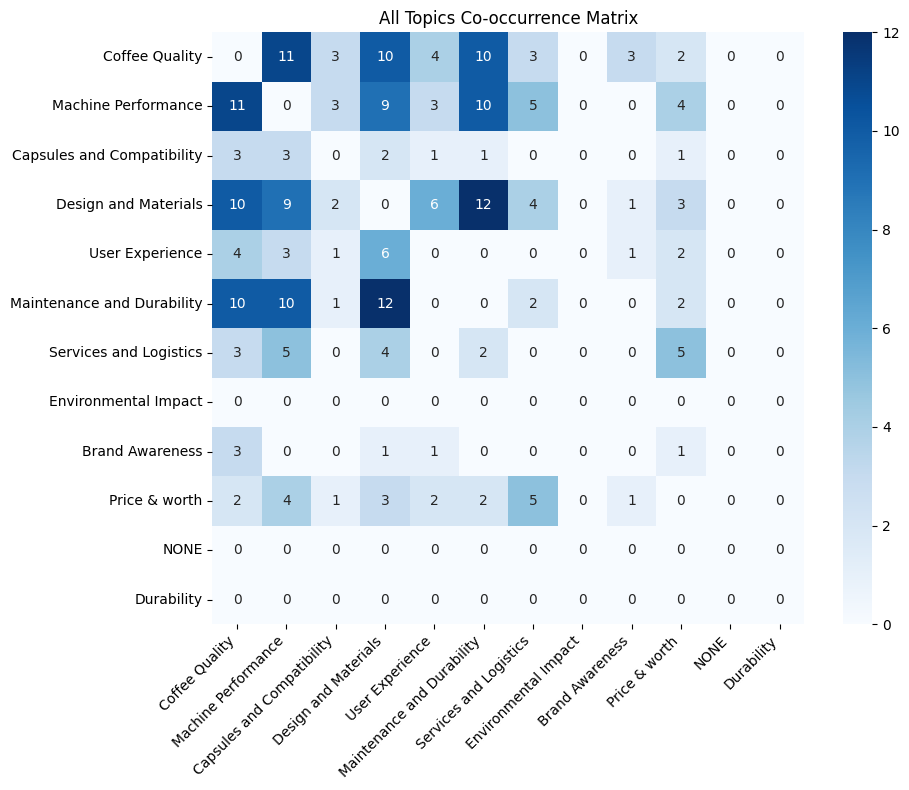

In [ ]:
def create_full_cooccurrence_matrix(df, positive_column, negative_column):
    """
    Creates a co-occurrence matrix based on both positive and negative topic columns.
    Each row represents a feedback instance, and the presence of topics is marked with 1.
    The diagonal of the matrix is set to zero to exclude self-co-occurrence.
    """

    # Creare una matrice binaria per i topic positivi e negativi
    binary_matrix = pd.DataFrame(0, index=df.index, columns=topics)

    for index, row in df.iterrows():
        active_topics = set()

        # Aggiungere i topic positivi
        if pd.notna(row[positive_column]):
            positive_topics = row[positive_column].split(",")
            active_topics.update([t.strip() for t in positive_topics])

        # Aggiungere i topic negativi
        if pd.notna(row[negative_column]):
            negative_topics = row[negative_column].split(",")
            active_topics.update([t.strip() for t in negative_topics])

        # Aggiornare la matrice binaria
        binary_matrix.loc[index, list(active_topics)] = 1

    # Creare la matrice di co-occorrenza
    cooccurrence_matrix = binary_matrix.T.dot(binary_matrix)

    # Impostare la diagonale a zero
    np.fill_diagonal(cooccurrence_matrix.values, 0)

    # Sostituire i NaN con 0
    cooccurrence_matrix = cooccurrence_matrix.fillna(0)

    # Convertire i valori in interi
    cooccurrence_matrix = cooccurrence_matrix.astype(int)

    return cooccurrence_matrix

# Creare la matrice di co-occorrenza per tutti i dati
full_matrix = create_full_cooccurrence_matrix(elaborated_feedbacks, "positiveTopicClass", "negativeTopicClass")

# Plot della matrice con palette cromatica personalizzata
plot_heatmap(full_matrix, "All Topics Co-occurrence Matrix", cmap="Blues")


## Topic Distribution

Calculates and visualizes the sentiment distribution (positive and negative) for each theme in customer reviews using a stacked bar chart. It excludes "Not Mentioned" responses to focus on relevant data.


Distribuzione dei sentiment per tema
                            Positive  Negative
Coffee Quality                    29         6
Machine Performance               21        11
Capsules and Compatibility         3         2
Design and Materials              30         7
User Experience                   10         1
Maintenance and Durability         1        20
Services and Logistics            13         7
Environmental Impact               0         1
Brand Awareness                    8         0
Price & worth                     11         4


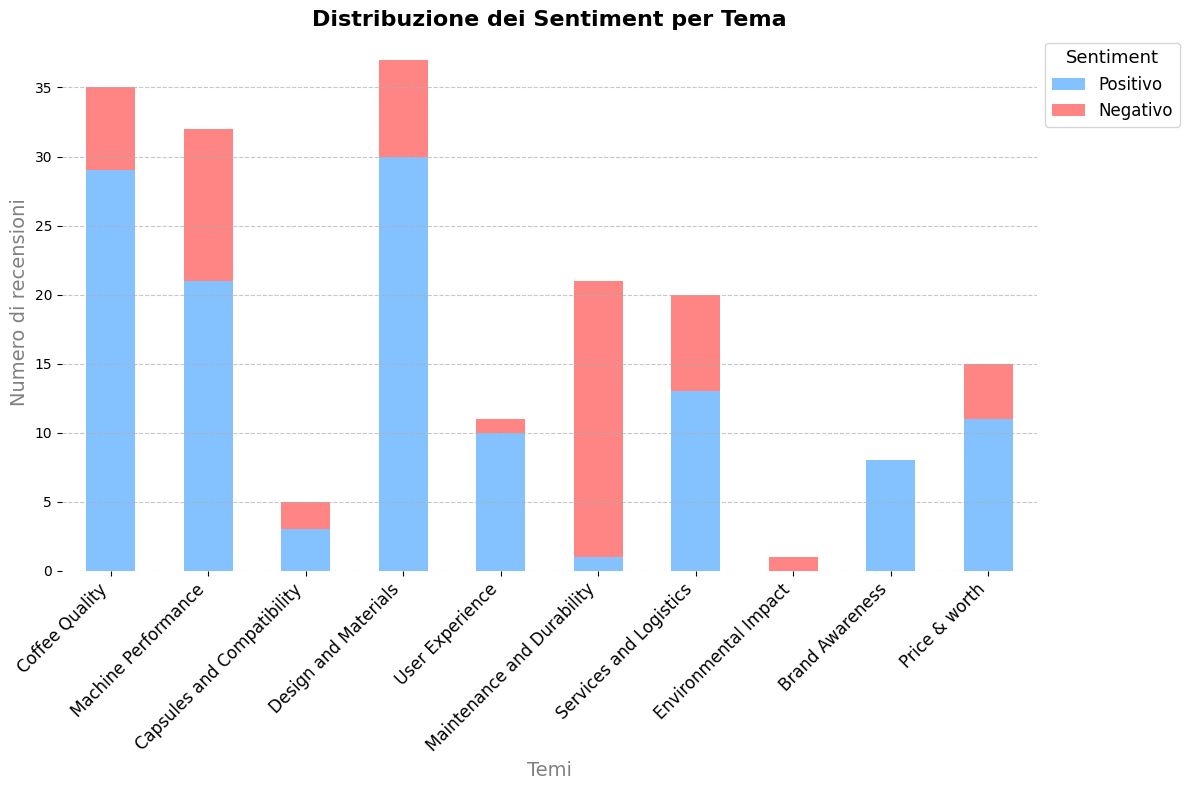

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def topic_distribution(df):
    # Lista dei topic
    topics = [
        "Coffee Quality", "Machine Performance", "Capsules and Compatibility",
        "Design and Materials", "User Experience", "Maintenance and Durability",
        "Services and Logistics", "Environmental Impact", "Brand Awareness", "Price & worth"
    ]

    # Creazione di un dizionario per contare i sentimenti per ogni tema
    sentiment_count = {topic: {'Positive': 0, 'Negative': 0} for topic in topics}

    # Conta le occorrenze dei temi positivi e negativi
    for _, row in df.iterrows():
        # Verifica se la colonna contiene un valore valido (stringa)
        positive_topics = str(row['positiveTopicClass']) if pd.notna(row['positiveTopicClass']) else ''
        negative_topics = str(row['negativeTopicClass']) if pd.notna(row['negativeTopicClass']) else ''

        for topic in topics:
            if topic in positive_topics:
                sentiment_count[topic]['Positive'] += 1
            if topic in negative_topics:
                sentiment_count[topic]['Negative'] += 1

    # Converte il dizionario in un DataFrame
    sentiment_distribution = pd.DataFrame(sentiment_count).T

    # Stampa la distribuzione dei sentiment
    print("\nDistribuzione dei sentiment per tema")
    print(sentiment_distribution)

    # Grafico a barre impilate per la distribuzione dei sentiment
    fig, ax = plt.subplots(figsize=(12, 8))
    sentiment_distribution.plot(kind='bar', stacked=True, ax=ax, color=['#66b3ff', '#ff6666'], alpha=0.8)  # Colori più armoniosi

    # Miglioramenti estetici del plot
    ax.set_title('Distribuzione dei Sentiment per Tema', fontsize=16, fontweight='bold', color='Black')
    ax.set_ylabel('Numero di recensioni', fontsize=14, color='gray')
    ax.set_xlabel('Temi', fontsize=14, color='gray')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12, color='black')

    # Posizionamento della legenda a destra
    ax.legend(title='Sentiment', labels=['Positivo', 'Negativo'], fontsize=12, title_fontsize=13, loc='upper left', bbox_to_anchor=(1, 1))

    # Aggiungi un bordo elegante
    for spine in ax.spines.values():
        spine.set_visible(False)

    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Migliora il layout
    plt.tight_layout()
    plt.show()

# Esegui la funzione con il DataFrame elaborated_feedbacks
topic_distribution(elaborated_feedbacks)


## Main negative aspects


Analyzes customer reviews to identify the most common negative sentiments across all themes in the dataset, highlights the primary negative aspect, and visualizes the results with bar charts for both overall concerns and specific primary issues.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def top_concerns(df, show_others=True):
    # Raggruppa gli aspetti negativi senza mappare i sinonimi
    primary_negative_aspects = df['primaryNegativeAspect'].value_counts()

    # Raggruppa aspetti con frequenza 1 nella categoria "Others"
    primary_negative_aspects = primary_negative_aspects.groupby(
        primary_negative_aspects.index.where(primary_negative_aspects > 1, "Others")
    ).sum()

    # Filtra i risultati per rimuovere "NONE"
    primary_negative_aspects = primary_negative_aspects[primary_negative_aspects.index != "NONE"]

    if not show_others:
        primary_negative_aspects = primary_negative_aspects[primary_negative_aspects.index != "Others"]

    if primary_negative_aspects.empty:
        print("Non ci sono aspetti principali negativi validi.")
    else:
        print("\nAspetto principale negativo")
        print(primary_negative_aspects.head(1))

        # Grafico a barre orizzontali per l'aspetto principale negativo
        plt.figure(figsize=(10, 6))
        sns.barplot(x=primary_negative_aspects.values, y=primary_negative_aspects.index, palette='Reds_d', alpha=0.8)

        # Personalizzazione grafico
        plt.title('Distribuzione degli aspetti principali negativi', fontsize=16, fontweight='bold')
        plt.xlabel('Numero di occorrenze', fontsize=14)
        plt.ylabel('Aspetti principali negativi', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.6)

        # Mostra il grafico
        plt.tight_layout()
        plt.show()

# Esempio di utilizzo
top_concerns(elaborated_feedbacks, show_others=False)


Non ci sono aspetti principali negativi validi.


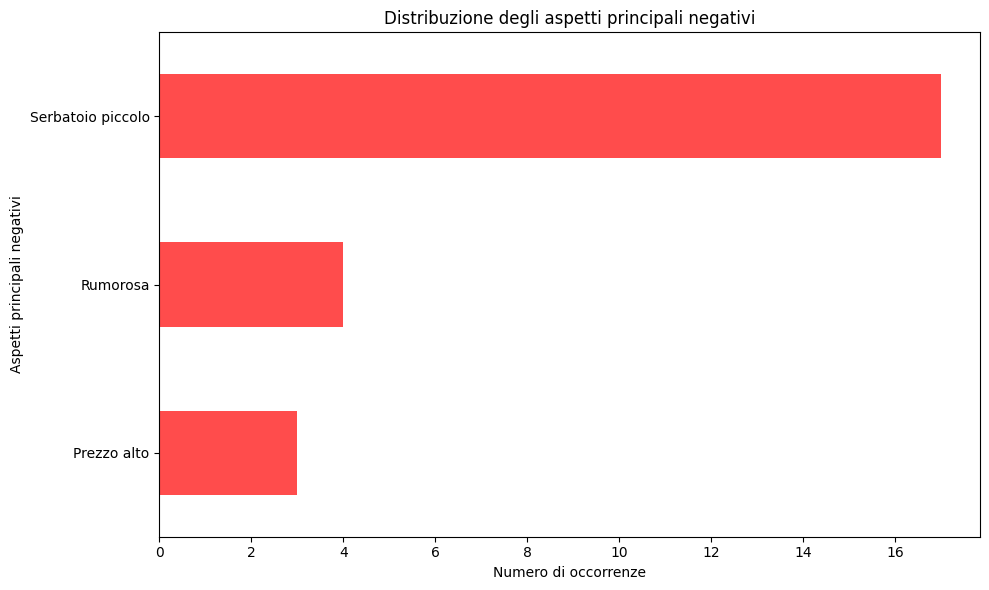

## Main positive aspects


Aspetto principale positivo
primaryPositiveAspect
Color    3
Name: count, dtype: int64


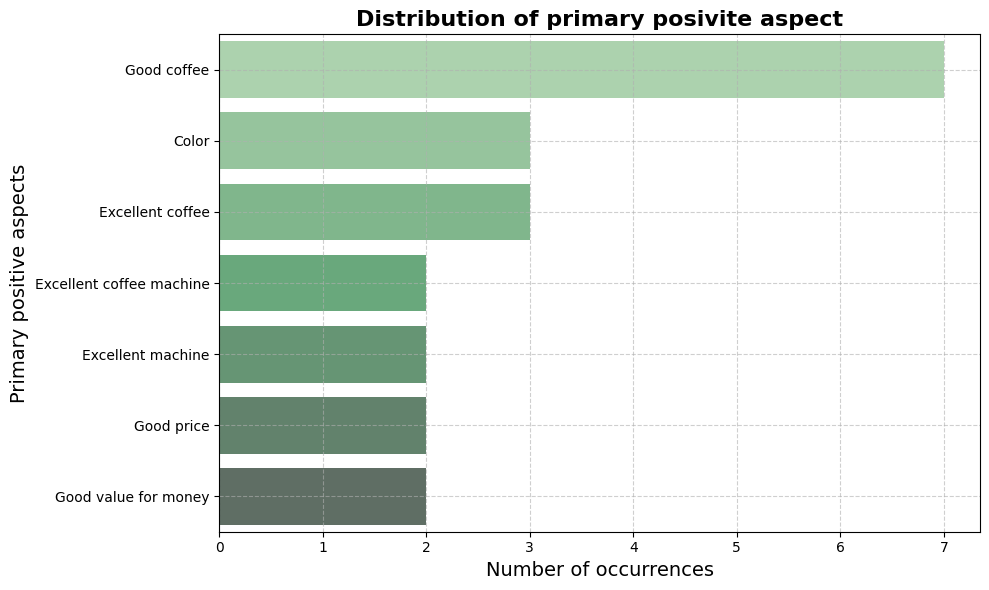

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def top_concerns_positive(df, show_others=True):
    # Raggruppa gli aspetti positivi senza mappare i sinonimi
    primary_positive_aspects = df['primaryPositiveAspect'].value_counts()

    # Raggruppa aspetti con frequenza 1 nella categoria "Others"
    primary_positive_aspects = primary_positive_aspects.groupby(
        primary_positive_aspects.index.where(primary_positive_aspects > 1, "Others")
    ).sum()

    # Filtra i risultati per rimuovere "NONE"
    primary_positive_aspects = primary_positive_aspects[primary_positive_aspects.index != "NONE"]

    if not show_others:
        primary_positive_aspects = primary_positive_aspects[primary_positive_aspects.index != "Others"]

    if primary_positive_aspects.empty:
        print("Non ci sono aspetti principali positivi validi.")
    else:
        print("\nAspetto principale positivo")
        print(primary_positive_aspects.head(1))

        # Ordinare gli aspetti per frequenza decrescente (da più frequente a meno frequente)
        primary_positive_aspects = primary_positive_aspects.sort_values(ascending=False)

        # Grafico a barre orizzontali per l'aspetto principale positivo
        plt.figure(figsize=(10, 6))
        sns.barplot(x=primary_positive_aspects.values, y=primary_positive_aspects.index, palette='Greens_d', hue=primary_positive_aspects.index, alpha=0.8, legend=False)

        # Personalizzazione grafico
        plt.title('Distribution of primary posivite aspect', fontsize=16, fontweight='bold')
        plt.xlabel('Number of occurrences', fontsize=14)
        plt.ylabel('Primary positive aspects', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.6)

        # Mostra il grafico
        plt.tight_layout()
        plt.show()

# Esempio di utilizzo
top_concerns_positive(elaborated_feedbacks, show_others=False)


## Topics within low score reviews

Within low score reviews (lower than 3) we want to know what kind of neagative topics and positive topics are discussed. It means that the negatives were big enough to offset the positives.

<ipython-input-88-1b98f8979a26>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_feedback['negativeTopicClass'] = negative_feedback['negativeTopicClass'].str.split(', ')


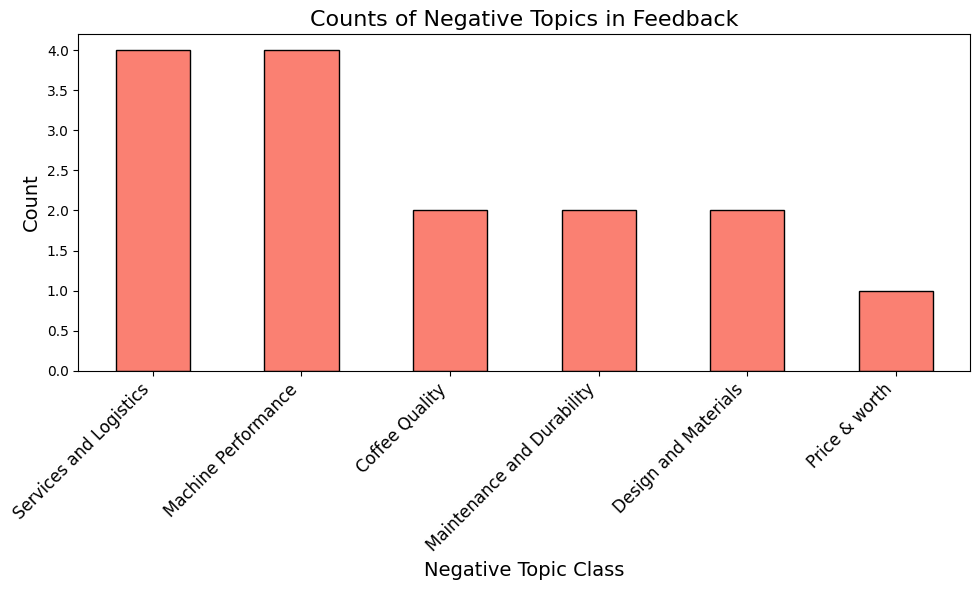

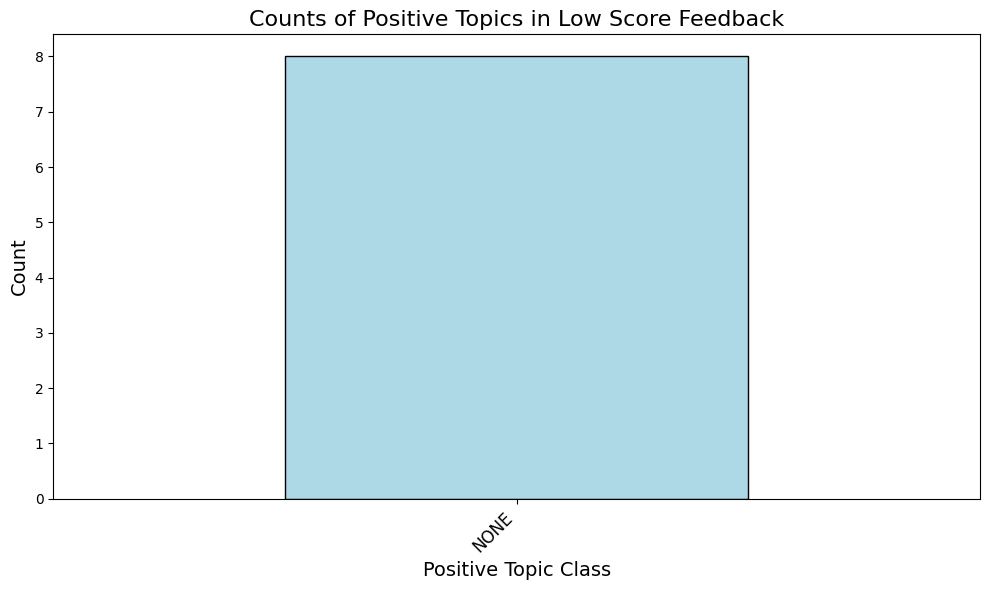

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define topics
topics = [
    "Coffee Quality", "Machine Performance", "Capsules and Compatibility",
    "Design and Materials", "User Experience", "Maintenance and Durability",
    "Services and Logistics", "Environmental Impact", "Brand Awareness", "Price & worth"
]

# Filter rows with feedbackRating < 3
negative_feedback = elaborated_feedbacks[elaborated_feedbacks['feedbackRating'] < 3]

# Split negativeTopicClass into separate topics
negative_feedback['negativeTopicClass'] = negative_feedback['negativeTopicClass'].str.split(', ')

# Explode the dataframe to handle multiple topics per row
negative_feedback_exploded = negative_feedback.explode('negativeTopicClass')

# Count occurrences of each negativeTopicClass
negative_topic_counts = negative_feedback_exploded['negativeTopicClass'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
negative_topic_counts.plot(kind='bar', color='salmon', edgecolor='black')

# Add labels and title
plt.title('Counts of Negative Topics in Feedback', fontsize=16)
plt.xlabel('Negative Topic Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Split positiveTopicClass into separate topics for low score reviews
positive_feedback_in_negative = negative_feedback.copy()
positive_feedback_in_negative['positiveTopicClass'] = positive_feedback_in_negative['positiveTopicClass'].str.split(', ')

# Explode the dataframe to handle multiple topics per row
positive_feedback_exploded = positive_feedback_in_negative.explode('positiveTopicClass')

# Count occurrences of each positiveTopicClass
positive_topic_counts_in_negative = positive_feedback_exploded['positiveTopicClass'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
positive_topic_counts_in_negative.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.title('Counts of Positive Topics in Low Score Feedback', fontsize=16)
plt.xlabel('Positive Topic Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Topics within high score reviews

<ipython-input-91-e71b8c0c5b54>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_feedback['negativeTopicClass'] = high_feedback['negativeTopicClass'].str.split(', ')


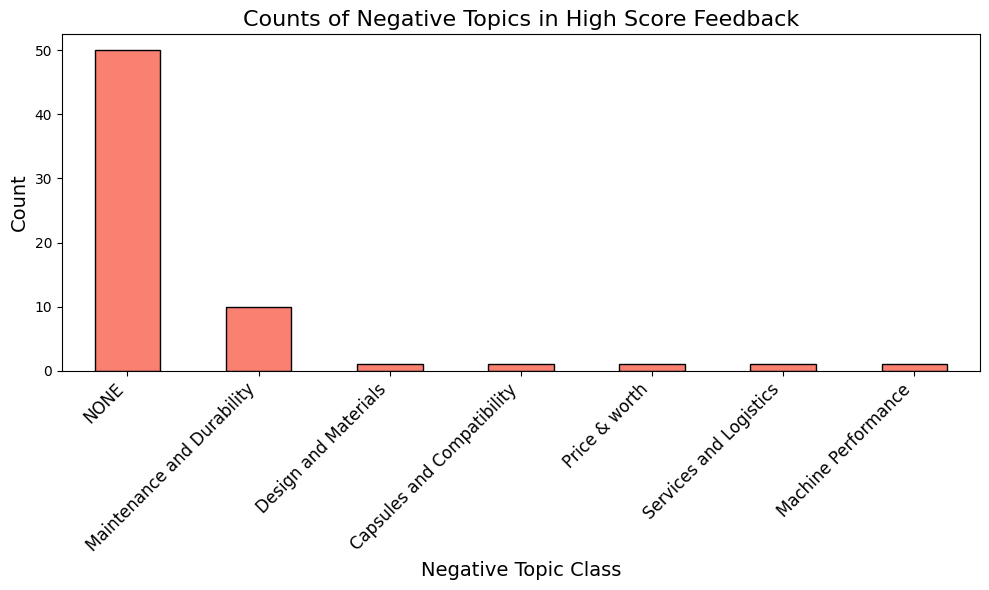

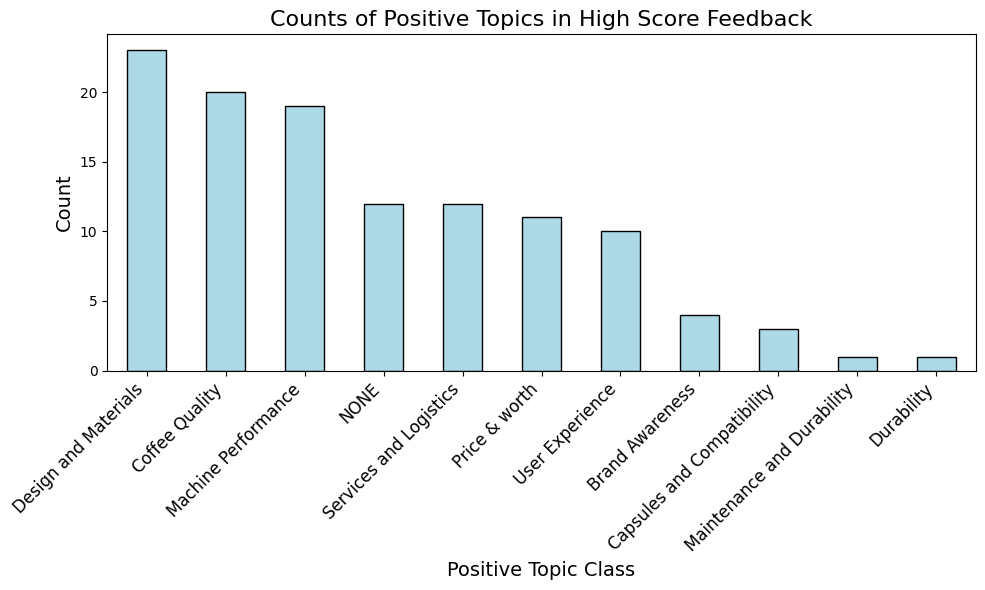

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define topics
topics = [
    "Coffee Quality", "Machine Performance", "Capsules and Compatibility",
    "Design and Materials", "User Experience", "Maintenance and Durability",
    "Services and Logistics", "Environmental Impact", "Brand Awareness", "Price & worth"
]

# Filter rows with feedbackRating >= 4 for high scoring reviews
high_feedback = elaborated_feedbacks[elaborated_feedbacks['feedbackRating'] >= 4]

# Split negativeTopicClass into separate topics for high scoring reviews
high_feedback['negativeTopicClass'] = high_feedback['negativeTopicClass'].str.split(', ')

# Explode the dataframe to handle multiple topics per row
high_feedback_exploded = high_feedback.explode('negativeTopicClass')

# Count occurrences of each negativeTopicClass
negative_topic_counts_high = high_feedback_exploded['negativeTopicClass'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
negative_topic_counts_high.plot(kind='bar', color='salmon', edgecolor='black')

# Add labels and title
plt.title('Counts of Negative Topics in High Score Feedback', fontsize=16)
plt.xlabel('Negative Topic Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Split positiveTopicClass into separate topics for high score reviews
positive_feedback_in_high = high_feedback.copy()
positive_feedback_in_high['positiveTopicClass'] = positive_feedback_in_high['positiveTopicClass'].str.split(', ')

# Explode the dataframe to handle multiple topics per row
positive_feedback_exploded_high = positive_feedback_in_high.explode('positiveTopicClass')

# Count occurrences of each positiveTopicClass
positive_topic_counts_in_high = positive_feedback_exploded_high['positiveTopicClass'].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))
positive_topic_counts_in_high.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.title('Counts of Positive Topics in High Score Feedback', fontsize=16)
plt.xlabel('Positive Topic Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
